# Hierarchial Clustering

[1] 1 1 1 1 2 2 2 2 3 3 3 3

[1] 1 1 1 1 2 2 2 2 1 1 1 1

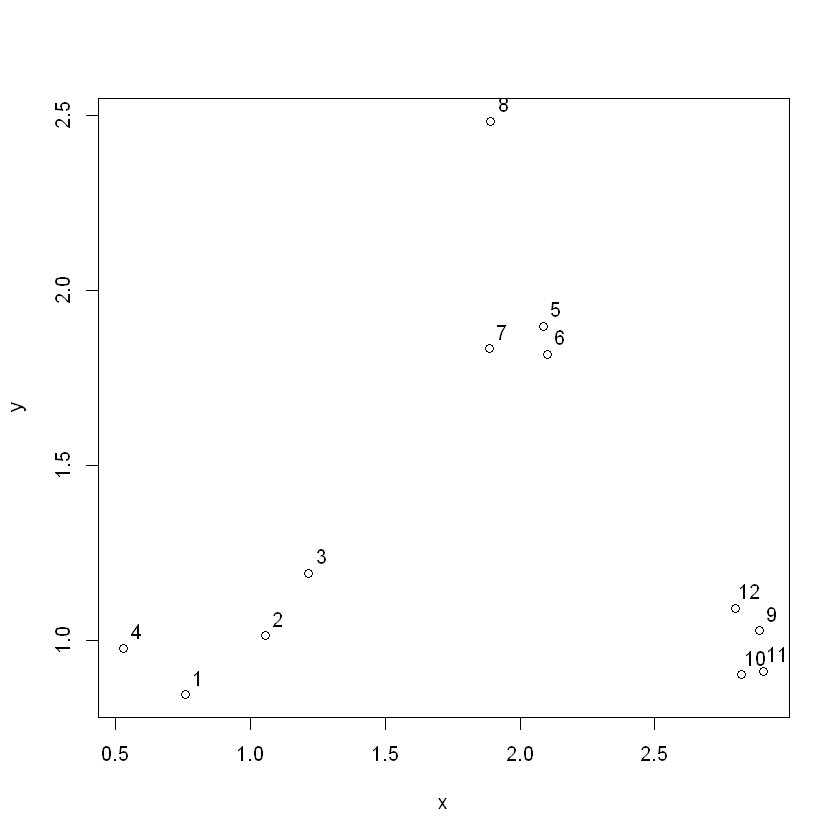

In [7]:
# We are going to cluster "close" points together out of 12 points

set.seed(1234)
x <- rnorm(12, rep(1:3, each = 4), 0.2)
rep(1:3, each = 4) # x means
y <- rnorm(12, rep(c(1, 2, 1), each = 4), 0.2)
rep(c(1, 2, 1), each = 4) # y means
plot(x,y)
text(x + 0.05, y + 0.05, labels = as.character(1:12))

In [12]:
# see the distance between each pair of points

df <- data.frame(x, y)
df
dist(df)
as.matrix(dist(df))

x,y
<dbl>,<dbl>
0.7585869,0.8447492
1.0554858,1.0128918
1.2168882,1.1918988
0.5308605,0.9779429
2.0858249,1.8977981
2.1012112,1.8177609
1.8850520,1.8325657
1.8906736,2.4831670
2.8871096,1.0268176


            1          2          3          4          5          6          7
2  0.34120511                                                                  
3  0.57493739 0.24102750                                                       
4  0.26381786 0.52578819 0.71861759                                            
5  1.69424700 1.35818182 1.11952883 1.80666768                                 
6  1.65812902 1.31960442 1.08338841 1.78081321 0.08150268                      
7  1.49823399 1.16620981 0.92568723 1.60131659 0.21110433 0.21666557           
8  1.99149025 1.69093111 1.45648906 2.02849490 0.61704200 0.69791931 0.65062566
9  2.13629539 1.83167669 1.67835968 2.35675598 1.18349654 1.11500116 1.28582631
10 2.06419586 1.76999236 1.63109790 2.29239480 1.23847877 1.16550201 1.32063059
11 2.14702468 1.85183204 1.71074417 2.37461984 1.28153948 1.21077373 1.37369662
12 2.05664233 1.74662555 1.58658782 2.27232243 1.07700974 1.00777231 1.17740375
            8          9         10     

,1,2,3,4,5,6,7,8,9,10,11,12
1,0.0000000,0.3412051,0.5749374,0.2638179,1.69424700,1.65812902,1.4982340,1.9914902,2.1362954,2.0641959,2.1470247,2.0566423
2,0.3412051,0.0000000,0.2410275,0.5257882,1.35818182,1.31960442,1.1662098,1.6909311,1.8316767,1.7699924,1.8518320,1.7466255
3,0.5749374,0.2410275,0.0000000,0.7186176,1.11952883,1.08338841,0.9256872,1.4564891,1.6783597,1.6310979,1.7107442,1.5865878
4,0.2638179,0.5257882,0.7186176,0.0000000,1.80666768,1.78081321,1.6013166,2.0284949,2.3567560,2.2923948,2.3746198,2.2723224
5,1.6942470,1.3581818,1.1195288,1.8066677,0.00000000,0.08150268,0.2111043,0.6170420,1.1834965,1.2384788,1.2815395,1.0770097
6,1.6581290,1.3196044,1.0833884,1.7808132,0.08150268,0.00000000,0.2166656,0.6979193,1.1150012,1.1655020,1.2107737,1.0077723
7,1.4982340,1.1662098,0.9256872,1.6013166,0.21110433,0.21666557,0.0000000,0.6506257,1.2858263,1.3206306,1.3736966,1.1774037
8,1.9914902,1.6909311,1.4564891,2.0284949,0.61704200,0.69791931,0.6506257,0.0000000,1.7646071,1.8351778,1.8699943,1.6622381
9,2.1362954,1.8316767,1.6783597,2.3567560,1.18349654,1.11500116,1.2858263,1.7646071,0.0000000,0.1409041,0.1162447,0.1084897
10,2.0641959,1.7699924,1.6310979,2.2923948,1.23847877,1.16550201,1.3206306,1.8351778,0.1409041,0.0000000,0.0831757,0.1912864


In [15]:
# convert to a matrix but make the diagonal values big to remove the zeros
rdistmatrix <- as.matrix(dist(df))
diag(rdistmatrix) <- diag(rdistmatrix)+1000 # make it somethign big instead of zero

# find index of the points with the minimul distance
ind <- which(rdistmatrix == min(rdistmatrix), arr.ind = TRUE)
ind

# plot again, color these two points
plot(x)

,row,col
6,6,5
5,5,6


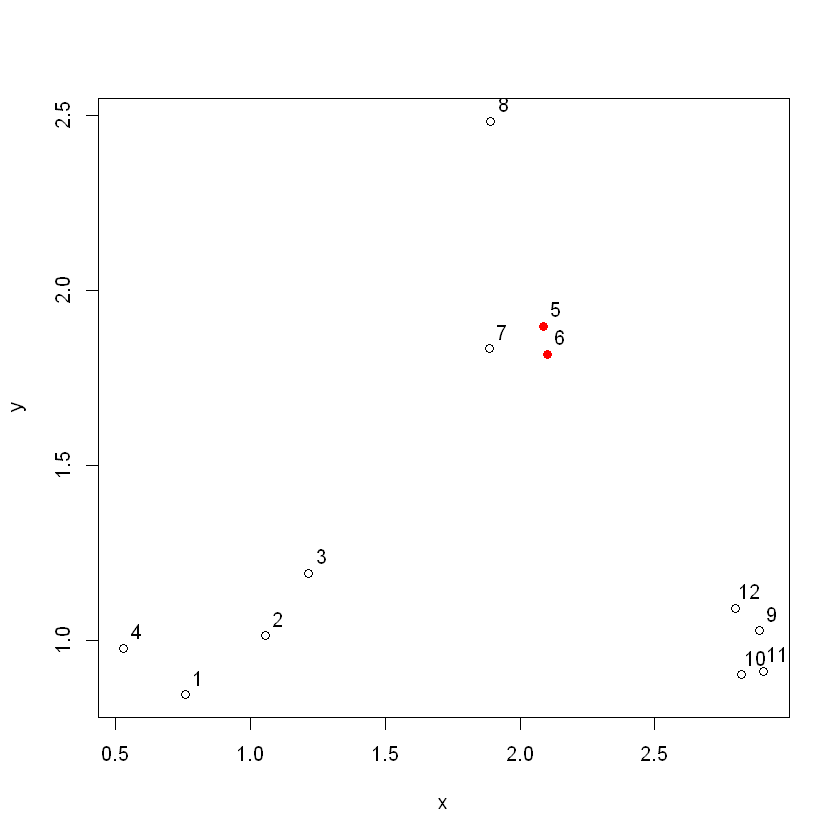

In [19]:
plot(x,y)
text(x + 0.05, y + 0.05, labels = as.character(1:12))
points(x[ind[1, ]], y[ind[1, ]], pch=19, col = 'red')

$merge
      [,1] [,2]
 [1,]   -5   -6
 [2,]  -10  -11
 [3,]   -9  -12
 [4,]    2    3
 [5,]   -7    1
 [6,]   -2   -3
 [7,]   -1   -4
 [8,]   -8    5
 [9,]    6    7
[10,]    4    8
[11,]    9   10

$height
 [1] 0.08150268 0.08317570 0.10848966 0.20802789 0.21666557 0.24102750
 [7] 0.26381786 0.69791931 0.71861759 1.86999431 2.37461984

$order
 [1]  2  3  1  4 10 11  9 12  8  7  5  6

$labels
NULL

$method
[1] "complete"

$call
hclust(d = dist(df))


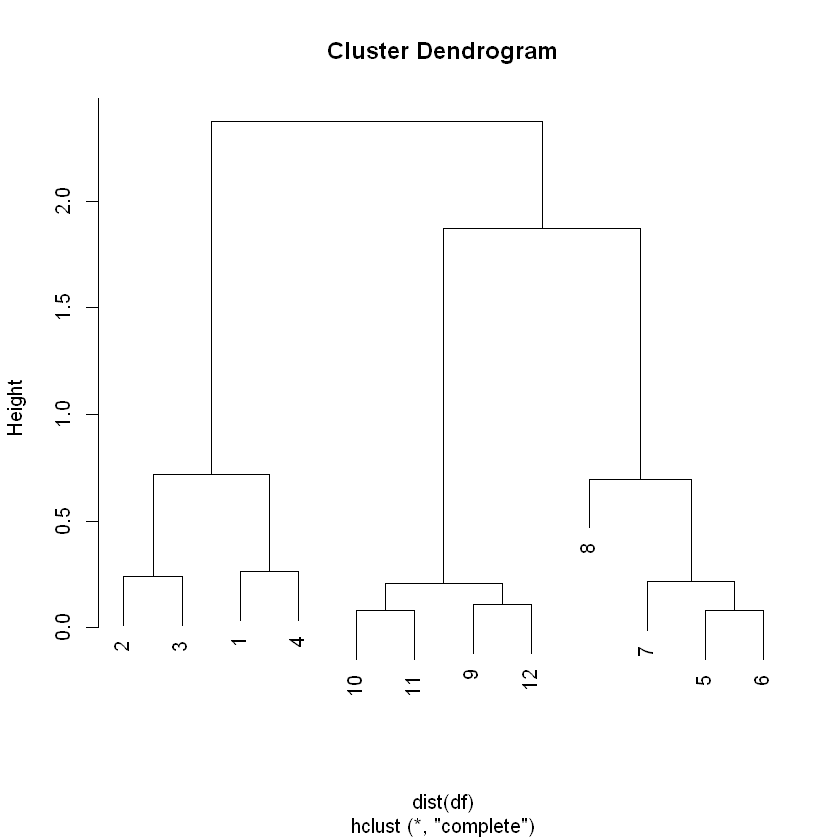

In [25]:
# dendogram
hClustering <- hclust(dist(df))
plot(hClustering)

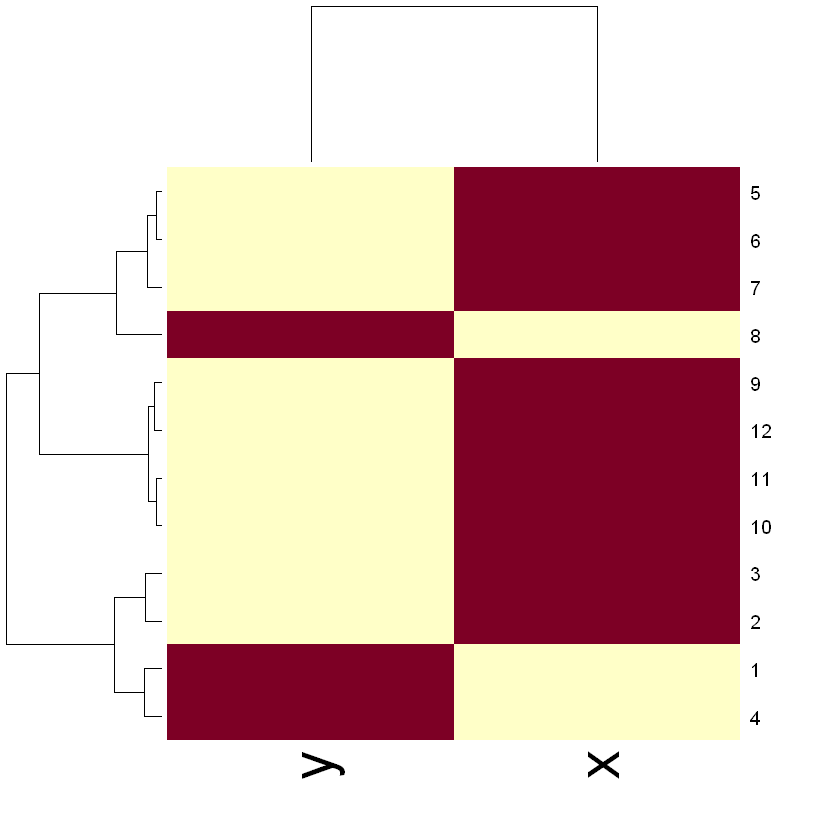

In [28]:
dmatrix <- data.matrix(df)
heatmap(dmatrix)